In [17]:
import stim
import random
from matplotlib import pyplot as plt
from jupyter_plotter import plot_jupyter_figure
import pymatching
from circuit_generators import get_custom_circuit
from sampling_functions import create_task_sinter, generate_samples_sinter, plot_error_rate_sinter

# Also define the number of worker nodes here
n_worker_nodes = 8
n_samples = 1000000
decoders = ['pymatching']

def generate_custom_circuit():
    # Function to generate a randomized string
    def generate_randomized_string(template, scale=1.0):
        result = template
        while "{rand}" in result:
            
            random_number = round(random.uniform(0.0000001, 0.000001), 7)  # Generate a random float number
            result = result.replace("{rand}", f"{random_number}", 1)
        return result

    templateCircuit = """
    QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25

R 1 3 5 8 10 12 15 17 19
X_ERROR({rand}) 1
X_ERROR({rand}) 3
X_ERROR({rand}) 5
X_ERROR({rand}) 8
X_ERROR({rand}) 10
X_ERROR({rand}) 12
X_ERROR({rand}) 15
X_ERROR({rand}) 17
X_ERROR({rand}) 19

R 2 9 11 13 14 16 18 25
X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25

TICK
DEPOLARIZE1({rand}) 1
DEPOLARIZE1({rand}) 3
DEPOLARIZE1({rand}) 5
DEPOLARIZE1({rand}) 8
DEPOLARIZE1({rand}) 10
DEPOLARIZE1({rand}) 12
DEPOLARIZE1({rand}) 15
DEPOLARIZE1({rand}) 17
DEPOLARIZE1({rand}) 19
H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

CX 2 3 16 17 11 12 15 14 10 9 19 18
DEPOLARIZE2({rand}) 2 3
DEPOLARIZE2({rand}) 16 17
DEPOLARIZE2({rand}) 11 12
DEPOLARIZE2({rand}) 15 14
DEPOLARIZE2({rand}) 10 9
DEPOLARIZE2({rand}) 19 18
TICK

CX 2 1 16 15 11 10 8 14 3 9 12 18
DEPOLARIZE2({rand}) 2 1
DEPOLARIZE2({rand}) 16 15
DEPOLARIZE2({rand}) 11 10
DEPOLARIZE2({rand}) 8 14
DEPOLARIZE2({rand}) 3 9
DEPOLARIZE2({rand}) 12 18
TICK

CX 16 10 11 5 25 19 8 9 17 18 12 13
DEPOLARIZE2({rand}) 16 10
DEPOLARIZE2({rand}) 11 5
DEPOLARIZE2({rand}) 25 19
DEPOLARIZE2({rand}) 8 9
DEPOLARIZE2({rand}) 17 18
DEPOLARIZE2({rand}) 12 13
TICK

CX 16 8 11 3 25 17 1 9 10 18 5 13
DEPOLARIZE2({rand}) 16 8
DEPOLARIZE2({rand}) 11 3
DEPOLARIZE2({rand}) 25 17
DEPOLARIZE2({rand}) 1 9
DEPOLARIZE2({rand}) 10 18
DEPOLARIZE2({rand}) 5 13
TICK

H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
MR 2 9 11 13 14 16 18 25
X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
TICK

DEPOLARIZE1({rand}) 1
DEPOLARIZE1({rand}) 3
DEPOLARIZE1({rand}) 5
DEPOLARIZE1({rand}) 8
DEPOLARIZE1({rand}) 10
DEPOLARIZE1({rand}) 12
DEPOLARIZE1({rand}) 15
DEPOLARIZE1({rand}) 17
DEPOLARIZE1({rand}) 19
H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

CX 2 3 16 17 11 12 15 14 10 9 19 18
DEPOLARIZE2({rand}) 2 3
DEPOLARIZE2({rand}) 16 17
DEPOLARIZE2({rand}) 11 12
DEPOLARIZE2({rand}) 15 14
DEPOLARIZE2({rand}) 10 9
DEPOLARIZE2({rand}) 19 18
TICK

CX 2 1 16 15 11 10 8 14 3 9 12 18
DEPOLARIZE2({rand}) 2 1
DEPOLARIZE2({rand}) 16 15
DEPOLARIZE2({rand}) 11 10
DEPOLARIZE2({rand}) 8 14
DEPOLARIZE2({rand}) 3 9
DEPOLARIZE2({rand}) 12 18
TICK

CX 16 10 11 5 25 19 8 9 17 18 12 13
DEPOLARIZE2({rand}) 16 10
DEPOLARIZE2({rand}) 11 5
DEPOLARIZE2({rand}) 25 19
DEPOLARIZE2({rand}) 8 9
DEPOLARIZE2({rand}) 17 18
DEPOLARIZE2({rand}) 12 13
TICK

CX 16 8 11 3 25 17 1 9 10 18 5 13
DEPOLARIZE2({rand}) 16 8
DEPOLARIZE2({rand}) 11 3
DEPOLARIZE2({rand}) 25 17
DEPOLARIZE2({rand}) 1 9
DEPOLARIZE2({rand}) 10 18
DEPOLARIZE2({rand}) 5 13
TICK

H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
MR 2 9 11 13 14 16 18 25
X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
TICK

DEPOLARIZE1({rand}) 1
DEPOLARIZE1({rand}) 3
DEPOLARIZE1({rand}) 5
DEPOLARIZE1({rand}) 8
DEPOLARIZE1({rand}) 10
DEPOLARIZE1({rand}) 12
DEPOLARIZE1({rand}) 15
DEPOLARIZE1({rand}) 17
DEPOLARIZE1({rand}) 19
H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

CX 2 3 16 17 11 12 15 14 10 9 19 18
DEPOLARIZE2({rand}) 2 3
DEPOLARIZE2({rand}) 16 17
DEPOLARIZE2({rand}) 11 12
DEPOLARIZE2({rand}) 15 14
DEPOLARIZE2({rand}) 10 9
DEPOLARIZE2({rand}) 19 18
TICK

CX 2 1 16 15 11 10 8 14 3 9 12 18
DEPOLARIZE2({rand}) 2 1
DEPOLARIZE2({rand}) 16 15
DEPOLARIZE2({rand}) 11 10
DEPOLARIZE2({rand}) 8 14
DEPOLARIZE2({rand}) 3 9
DEPOLARIZE2({rand}) 12 18
TICK

CX 16 10 11 5 25 19 8 9 17 18 12 13
DEPOLARIZE2({rand}) 16 10
DEPOLARIZE2({rand}) 11 5
DEPOLARIZE2({rand}) 25 19
DEPOLARIZE2({rand}) 8 9
DEPOLARIZE2({rand}) 17 18
DEPOLARIZE2({rand}) 12 13
TICK

CX 16 8 11 3 25 17 1 9 10 18 5 13
DEPOLARIZE2({rand}) 16 8
DEPOLARIZE2({rand}) 11 3
DEPOLARIZE2({rand}) 25 17
DEPOLARIZE2({rand}) 1 9
DEPOLARIZE2({rand}) 10 18
DEPOLARIZE2({rand}) 5 13
TICK

H 2 11 16 25
DEPOLARIZE1({rand}) 2
DEPOLARIZE1({rand}) 11
DEPOLARIZE1({rand}) 16
DEPOLARIZE1({rand}) 25
TICK

X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
MR 2 9 11 13 14 16 18 25
X_ERROR({rand}) 2
X_ERROR({rand}) 9
X_ERROR({rand}) 11
X_ERROR({rand}) 13
X_ERROR({rand}) 14
X_ERROR({rand}) 16
X_ERROR({rand}) 18
X_ERROR({rand}) 25
SHIFT_COORDS(0, 0, 1)
DETECTOR(2, 0, 0) rec[-8] rec[-16]
DETECTOR(2, 2, 0) rec[-7] rec[-15]
DETECTOR(4, 2, 0) rec[-6] rec[-14]
DETECTOR(6, 2, 0) rec[-5] rec[-13]
DETECTOR(0, 4, 0) rec[-4] rec[-12]
DETECTOR(2, 4, 0) rec[-3] rec[-11]
DETECTOR(4, 4, 0) rec[-2] rec[-10]
DETECTOR(4, 6, 0) rec[-1] rec[-9]

X_ERROR({rand}) 1
X_ERROR({rand}) 3
X_ERROR({rand}) 5
X_ERROR({rand}) 8
X_ERROR({rand}) 10
X_ERROR({rand}) 12
X_ERROR({rand}) 15
X_ERROR({rand}) 17
X_ERROR({rand}) 19
M 1 3 5 8 10 12 15 17 19
DETECTOR(0, 4, 1) rec[-3] rec[-6] rec[-13]
DETECTOR(2, 2, 1) rec[-5] rec[-6] rec[-8] rec[-9] rec[-16]
DETECTOR(4, 4, 1) rec[-1] rec[-2] rec[-4] rec[-5] rec[-11]
DETECTOR(6, 2, 1) rec[-4] rec[-7] rec[-14]
OBSERVABLE_INCLUDE(0) rec[-7] rec[-8] rec[-9]
    """

    randomized_circuit_string = generate_randomized_string(templateCircuit)
    custom_circuit = stim.Circuit(randomized_circuit_string)
    return custom_circuit

# Generate samples for custom circuit
custom_circuit = generate_custom_circuit()
custom_circuit_task = create_task_sinter(
    fcn_circuit_generator=generate_custom_circuit,
    args_circuit_generator={}
)
custom_circuit_results = generate_samples_sinter(
    num_workers=n_worker_nodes,
    tasks=[custom_circuit_task],
    decoders=decoders,
    num_samples=n_samples,
)


In [18]:
custom_circuit_results[0].errors / custom_circuit_results[0].shots

0.108088

TypeError: 'TaskStats' object is not subscriptable

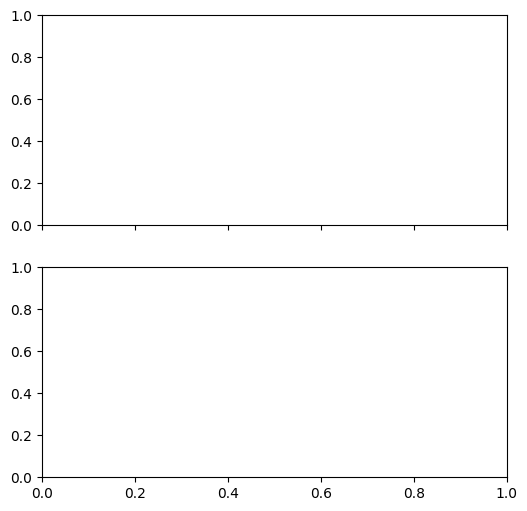

In [7]:

# Plot error rates
fig, (axl, axr) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# Plot custom circuit task
axl.plot([custom_circuit_results[0]['logical_error_rate_per_shot']], marker='o', label='Custom circuit')
axr.plot([custom_circuit_results[0]['logical_error_rate_per_round']], marker='o', label='Custom circuit')

axl.legend()
axr.legend()
axl.label_outer()
axr.label_outer()
fig.set_dpi(300)
plot_jupyter_figure(fig)